In [19]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Data Manipulation for supervised learning problems


I would like to start with the most basic model imaginable possible which is ordinary least squares regression. Since we have time series data a necessary step before fitting the model is to process the data in a way such that we have a supervised learning problem. We do that by shifting the whole data set by one time-step. Repeating this five times yields a data set that have containts the information of the last five time steps which then can be used to predict the energy output of the current time step.

In [20]:
# load the data
turbine_two = pd.read_csv('../data/cleaned/turbine_two.csv')

# use date column as index and convert to datetime
turbine_two['Date'] = pd.to_datetime(turbine_two['Date'])
turbine_two.set_index('Date', inplace=True)


# create shifts of the data 
n_shifts = [1, 2, 3, 4, 5]

for column in turbine_two.columns:
    for i in n_shifts:
        turbine_two[f'{column} (time {-i})'] = turbine_two[column].shift(i)

# drop columns of current time step except for power
turbine_two.drop(columns=['Wind speed (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Energy Export (kWh)',
                          'Nacelle ambient temperature (°C)', 'Rotor speed (RPM)'], inplace=True)

# drop rows with NaN values
turbine_two.dropna(inplace=True)


turbine_two.head()


,Power (kW),Wind speed (m/s) (time -1),Wind speed (m/s) (time -2),Wind speed (m/s) (time -3),Wind speed (m/s) (time -4),Wind speed (m/s) (time -5),Wind direction (°) (time -1),Wind direction (°) (time -2),Wind direction (°) (time -3),Wind direction (°) (time -4),...,Nacelle ambient temperature (°C) (time -1),Nacelle ambient temperature (°C) (time -2),Nacelle ambient temperature (°C) (time -3),Nacelle ambient temperature (°C) (time -4),Nacelle ambient temperature (°C) (time -5),Rotor speed (RPM) (time -1),Rotor speed (RPM) (time -2),Rotor speed (RPM) (time -3),Rotor speed (RPM) (time -4),Rotor speed (RPM) (time -5)
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 10:40:00,394.898346,5.006634,4.905113,5.723492,5.057806,6.852325,283.519012,288.565460,271.625793,270.577423,...,11.955,11.700,11.655,11.305,10.835,9.273199,9.650973,11.043722,10.031982,12.381912
2016-05-03 10:50:00,173.334015,5.657807,5.006634,4.905113,5.723492,5.057806,271.447266,283.519012,288.565460,271.625793,...,11.500,11.955,11.700,11.655,11.305,10.659193,9.273199,9.650973,11.043722,10.031982
2016-05-03 11:00:00,149.254593,4.163436,5.657807,5.006634,4.905113,5.723492,276.309357,271.447266,283.519012,288.565460,...,12.405,11.500,11.955,11.700,11.655,8.994538,10.659193,9.273199,9.650973,11.043722
2016-05-03 11:10:00,318.482910,4.431150,4.163436,5.657807,5.006634,4.905113,279.650452,276.309357,271.447266,283.519012,...,11.905,12.405,11.500,11.955,11.700,8.744345,8.994538,10.659193,9.273199,9.650973
2016-05-03 11:20:00,356.606689,5.683527,4.431150,4.163436,5.657807,5.006634,292.041290,279.650452,276.309357,271.447266,...,11.845,11.905,12.405,11.500,11.955,10.005468,8.744345,8.994538,10.659193,9.273199


In [21]:
# create hourly data set
# shift data by additionaly 5 time steps to get a full hour
turbine_two_hourly = turbine_two.iloc[:, 1:].shift(5)

# put column 'Power (kW)' in data frame
turbine_two_hourly['Power (kW)'] = turbine_two['Power (kW)']

# drop rows with NaN values
turbine_two_hourly.dropna(inplace=True)

turbine_two_hourly.head()


,Wind speed (m/s) (time -1),Wind speed (m/s) (time -2),Wind speed (m/s) (time -3),Wind speed (m/s) (time -4),Wind speed (m/s) (time -5),Wind direction (°) (time -1),Wind direction (°) (time -2),Wind direction (°) (time -3),Wind direction (°) (time -4),Wind direction (°) (time -5),...,Nacelle ambient temperature (°C) (time -2),Nacelle ambient temperature (°C) (time -3),Nacelle ambient temperature (°C) (time -4),Nacelle ambient temperature (°C) (time -5),Rotor speed (RPM) (time -1),Rotor speed (RPM) (time -2),Rotor speed (RPM) (time -3),Rotor speed (RPM) (time -4),Rotor speed (RPM) (time -5),Power (kW)
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 11:30:00,5.006634,4.905113,5.723492,5.057806,6.852325,283.519012,288.565460,271.625793,270.577423,262.792908,...,11.700,11.655,11.305,10.835,9.273199,9.650973,11.043722,10.031982,12.381912,375.301788
2016-05-03 11:40:00,5.657807,5.006634,4.905113,5.723492,5.057806,271.447266,283.519012,288.565460,271.625793,270.577423,...,11.955,11.700,11.655,11.305,10.659193,9.273199,9.650973,11.043722,10.031982,368.632690
2016-05-03 11:50:00,4.163436,5.657807,5.006634,4.905113,5.723492,276.309357,271.447266,283.519012,288.565460,271.625793,...,11.500,11.955,11.700,11.655,8.994538,10.659193,9.273199,9.650973,11.043722,271.430298
2016-05-03 12:00:00,4.431150,4.163436,5.657807,5.006634,4.905113,279.650452,276.309357,271.447266,283.519012,288.565460,...,12.405,11.500,11.955,11.700,8.744345,8.994538,10.659193,9.273199,9.650973,376.643097
2016-05-03 12:10:00,5.683527,4.431150,4.163436,5.657807,5.006634,292.041290,279.650452,276.309357,271.447266,283.519012,...,11.905,12.405,11.500,11.955,10.005468,8.744345,8.994538,10.659193,9.273199,512.471313


In [22]:
# create daily data set

print(f'24 Hours is exactly {6 * 24} time steps')

# shift data by additionally 6 * 24 - 1 time steps to get a full day
turbine_two_daily = turbine_two.iloc[:, 1:].shift(6 * 24 - 1)

# put column 'Power (kW)' in data frame
turbine_two_daily['Power (kW)'] = turbine_two['Power (kW)']

# drop rows with NaN values
turbine_two_daily.dropna(inplace=True)

turbine_two_daily.head()

24 Hours is exactly 144 time steps


,Wind speed (m/s) (time -1),Wind speed (m/s) (time -2),Wind speed (m/s) (time -3),Wind speed (m/s) (time -4),Wind speed (m/s) (time -5),Wind direction (°) (time -1),Wind direction (°) (time -2),Wind direction (°) (time -3),Wind direction (°) (time -4),Wind direction (°) (time -5),...,Nacelle ambient temperature (°C) (time -2),Nacelle ambient temperature (°C) (time -3),Nacelle ambient temperature (°C) (time -4),Nacelle ambient temperature (°C) (time -5),Rotor speed (RPM) (time -1),Rotor speed (RPM) (time -2),Rotor speed (RPM) (time -3),Rotor speed (RPM) (time -4),Rotor speed (RPM) (time -5),Power (kW)
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-04 10:30:00,5.006634,4.905113,5.723492,5.057806,6.852325,283.519012,288.565460,271.625793,270.577423,262.792908,...,11.700,11.655,11.305,10.835,9.273199,9.650973,11.043722,10.031982,12.381912,1034.276733
2016-05-04 10:40:00,5.657807,5.006634,4.905113,5.723492,5.057806,271.447266,283.519012,288.565460,271.625793,270.577423,...,11.955,11.700,11.655,11.305,10.659193,9.273199,9.650973,11.043722,10.031982,667.225830
2016-05-04 10:50:00,4.163436,5.657807,5.006634,4.905113,5.723492,276.309357,271.447266,283.519012,288.565460,271.625793,...,11.500,11.955,11.700,11.655,8.994538,10.659193,9.273199,9.650973,11.043722,531.438599
2016-05-04 11:00:00,4.431150,4.163436,5.657807,5.006634,4.905113,279.650452,276.309357,271.447266,283.519012,288.565460,...,12.405,11.500,11.955,11.700,8.744345,8.994538,10.659193,9.273199,9.650973,905.801025
2016-05-04 11:10:00,5.683527,4.431150,4.163436,5.657807,5.006634,292.041290,279.650452,276.309357,271.447266,283.519012,...,11.905,12.405,11.500,11.955,10.005468,8.744345,8.994538,10.659193,9.273199,896.867798


In [23]:
# center the data around the mean except for the target column (Power (kW))
for column in turbine_two.columns:
    if column != 'Power (kW)':
        turbine_two[column] = turbine_two[column] - turbine_two[column].mean()
        turbine_two_hourly[column] = turbine_two_hourly[column] - turbine_two_hourly[column].mean()

# 2. Linear Regression

In [24]:
# imports for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error


### 2.1. 10 min Forecast

In [25]:
# create X and y
X = turbine_two.drop('Power (kW)', axis=1)
y = turbine_two['Power (kW)']


# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False because we want to keep the time aspect

In [26]:
# create the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# calculate the mae, the mean squared error and rmse
mae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



MSE: 20730.660862122142
RMSE: 143.98146013331765
MAE: 53.197553908160195


In [27]:
# short calculation how many days we are forcasting
print(f'We are forecasting {round(len(y_test) * 10 / 60 / 24, 2)} days')

We are forecasting 367.36 days


This is longer than the forecast in the given baseline, but includes the same time period.

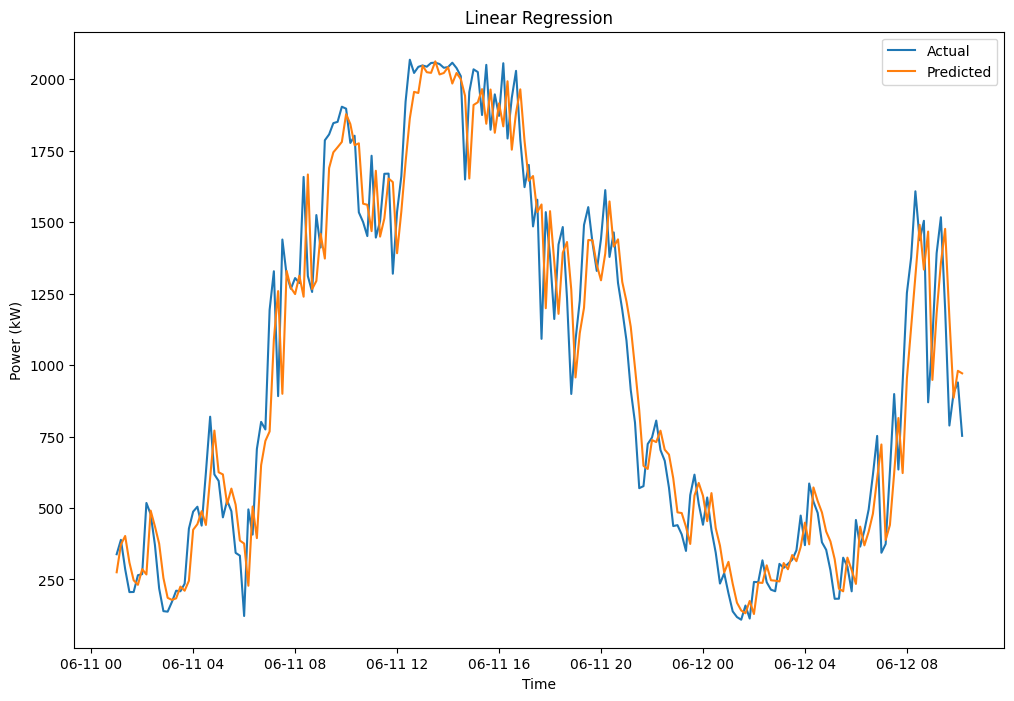

In [28]:
# plot predictions vs actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.keys()[300:500], y_test[300:500], label='Actual')
plt.plot(y_test.keys()[300:500], y_pred[300:500], label='Predicted')

# plot months as xticks
#plt.xticks(ticks=np.arange(0, 200, 10), labels=y_test.keys()[:200:10], rotation=90)

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Linear Regression')

plt.legend()
plt.show()

**Analysis:** It seems like linear regression just shifts the curve one time-step to the right. So the question arises if it is even better than the most basic model imaginable, i.e. outputting the value of the time-step before. In the following we look if such a model

In [29]:
# errors of most basic model
mse = mean_squared_error(turbine_two['Power (kW)'], turbine_two['Power (kW) (time -1)'])
rmse = np.sqrt(mse)
mae = median_absolute_error(turbine_two['Power (kW)'], turbine_two['Power (kW) (time -1)'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 502633.04120479745
RMSE: 708.9661777580067
MAE: 691.889296622321


Good for us: this is not the case. Doing a linear regression on the data reduces the error by a large amount. Thus we keep linear regression as our baseline model.

### 2.1. Hourly Forecast

In [30]:
# create X and y
X = turbine_two_hourly.drop('Power (kW)', axis=1)
y = turbine_two_hourly['Power (kW)']

# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False because we want to keep the time aspect

In [31]:
# create the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# calculate the mae, the mean squared error and rmse
mae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 65283.14332091416
RMSE: 255.50566201341638
MAE: 120.18033372963276


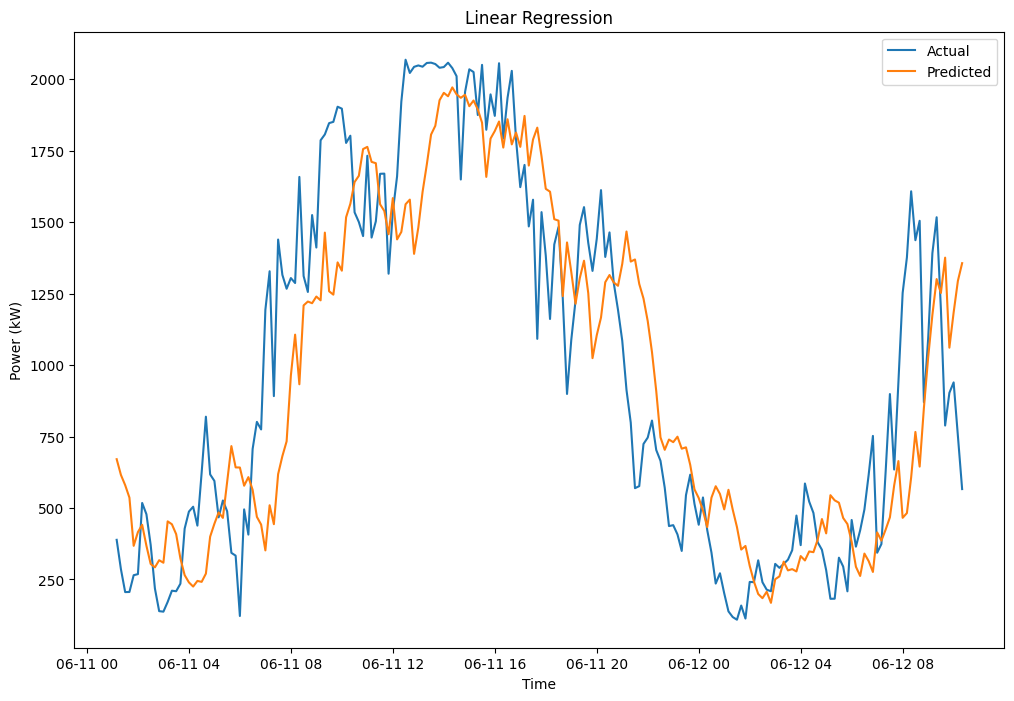

In [32]:
# plot predictions vs actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.keys()[300:500], y_test[300:500], label='Actual')
plt.plot(y_test.keys()[300:500], y_pred[300:500], label='Predicted')

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Linear Regression')

plt.legend()
plt.show()

### 2.3. Daily forecast

In [36]:
# create X and y
X = turbine_two_daily.drop('Power (kW)', axis=1)
y = turbine_two_daily['Power (kW)']

# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False because we want to keep the time aspect

In [37]:
# create the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# calculate the mae, the mean squared error and rmse
mae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 386254.5821843105
RMSE: 621.4938311715656
MAE: 451.8535218575563


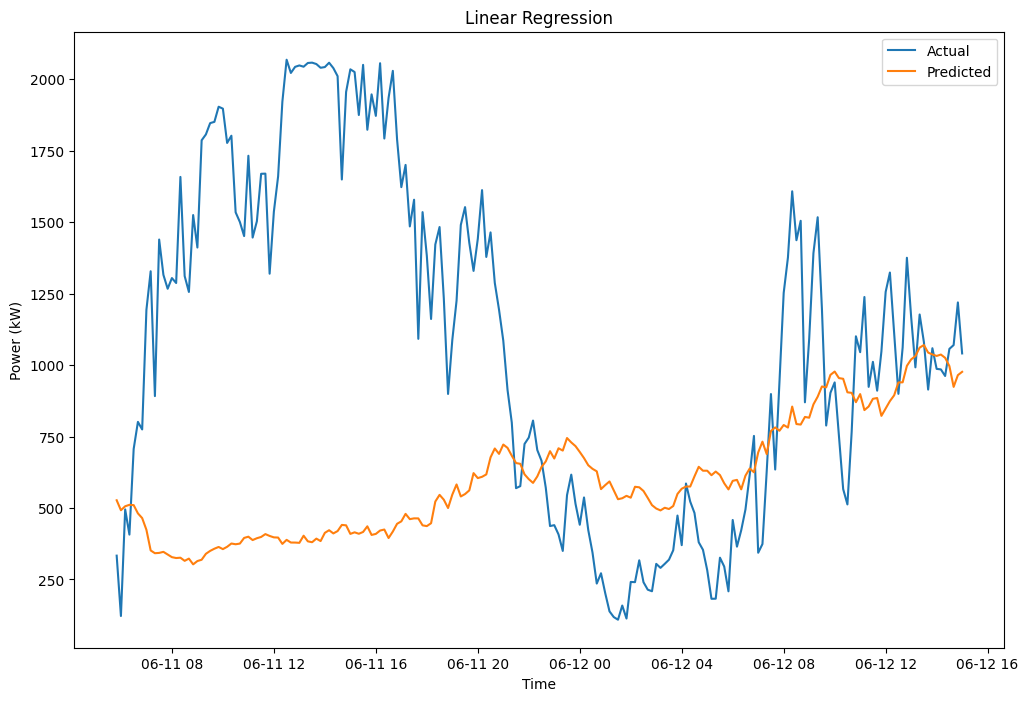

In [38]:
# plot predictions vs actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.keys()[300:500], y_test[300:500], label='Actual')
plt.plot(y_test.keys()[300:500], y_pred[300:500], label='Predicted')

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Linear Regression')

plt.legend()
plt.show()

This curve looks really bad and has nothing to do with the ground truth. 

# 2. Gaussian Process

A Gaussian Process have the advantage that it gives us additionally an uncertainty estimate.

In [33]:
### WARNING: this crashes the kernel since we have too many data points --> use itergp instead to approximate the Gaussian Process

# imports for Gaussian Process
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF

# We can use the same X and y as before
# create the model
# gp = GaussianProcessRegressor(kernel=RBF())

# # fit the model
# gp.fit(X_train, y_train)
# print("fitting done")

# # make predictions
# y_pred = gp.predict(X_test)

# # calculate the mae, the mean squared error and rmse
# mae = median_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}')
# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')


Since the full calculation of the gaussian process posterior seems intractable by my machine, we choose the library itergp which approximates a GP. [Tutorial](https://itergp.readthedocs.io/en/latest/tutorials/quickstart.html)

In [34]:
from probnum import linops, randvars, backend
from probnum.randprocs import kernels, mean_fns

from itergp import GaussianProcess


In [35]:

# Model
mean_fn = mean_fns.Zero(input_shape=input_shape, output_shape=output_shape)
kernel = kernels.Matern(input_shape=input_shape, nu=2.5, lengthscale=0.15)
gp = GaussianProcess(mean_fn, kernel)

# Likelihood
sigma_sq = 0.1
noise = randvars.Normal(
    mean=backend.zeros(y.shape),
    cov=linops.Scaling(sigma_sq, shape=(num_data, num_data)),
)

NameError: name 'input_shape' is not defined